In [4]:
import torch
import matplotlib.pyplot as plt
import os
import pandas as pd
import PlotModule

## load the model

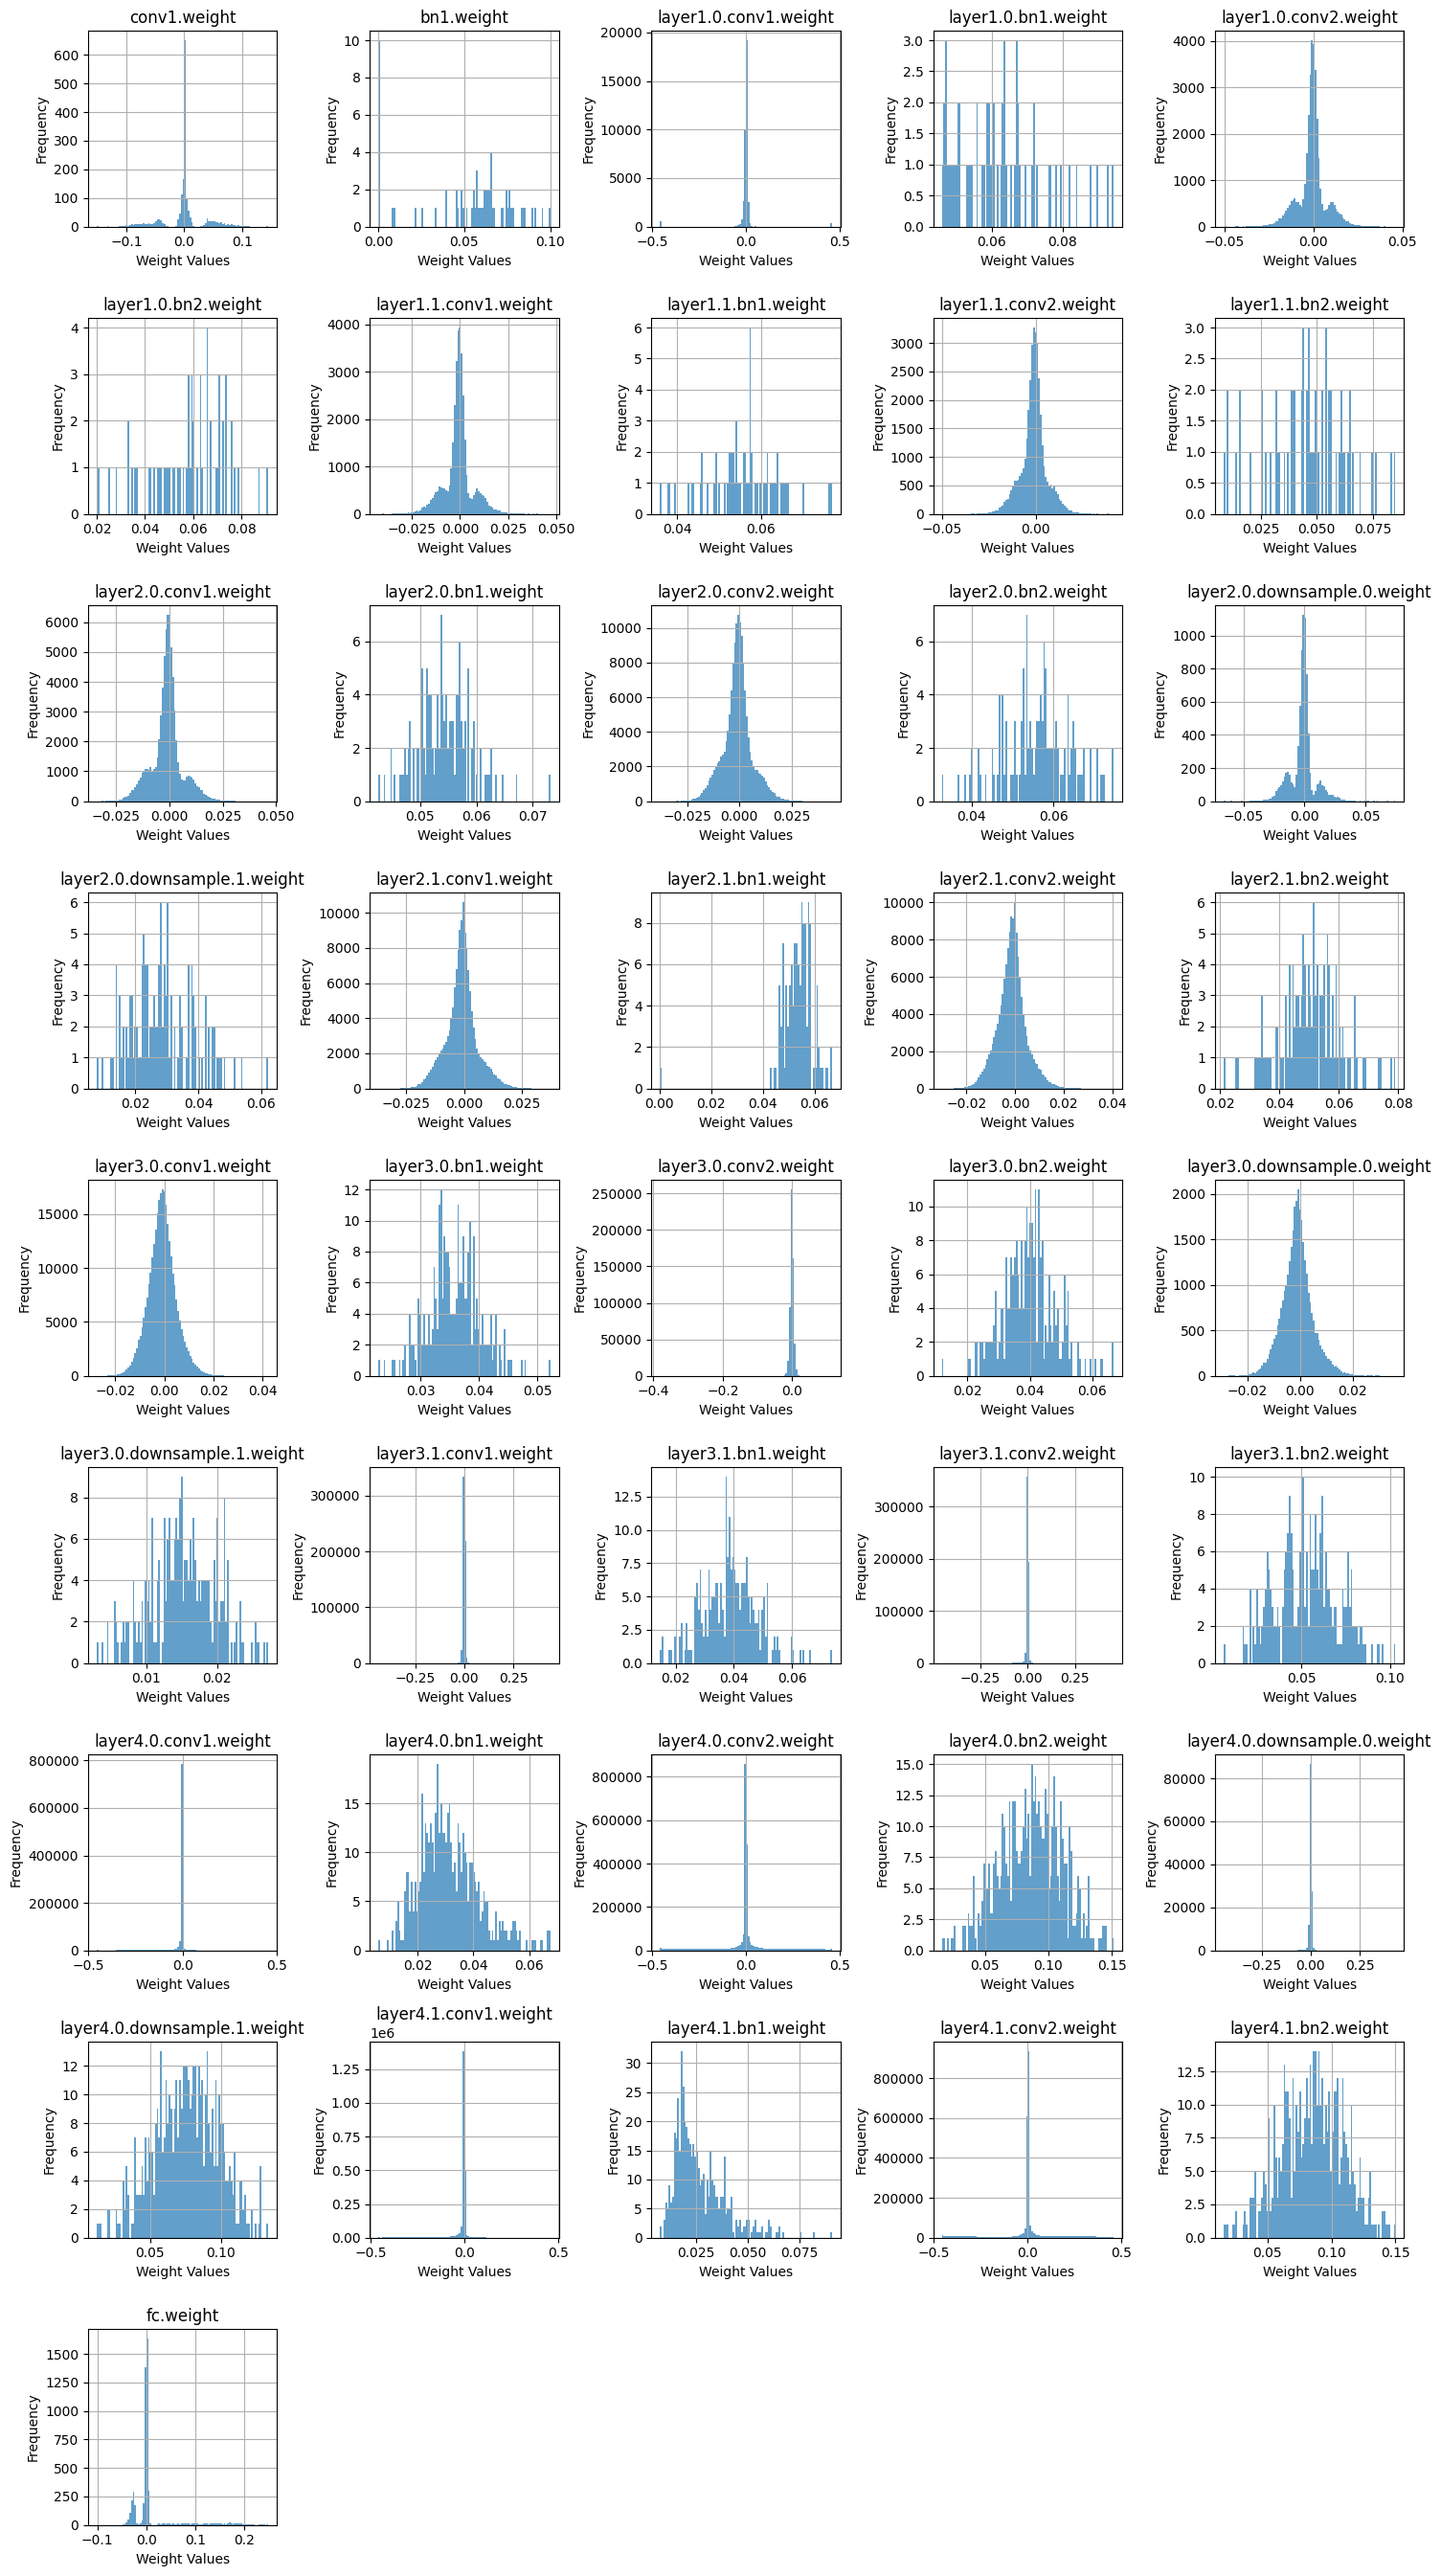

In [13]:
folder_name = 'Resnet18_p0.7'
model_name = '/FT_rev1.1_0.0001_30/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
new_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")

PlotModule.plot_weight_dist_all(new_model)

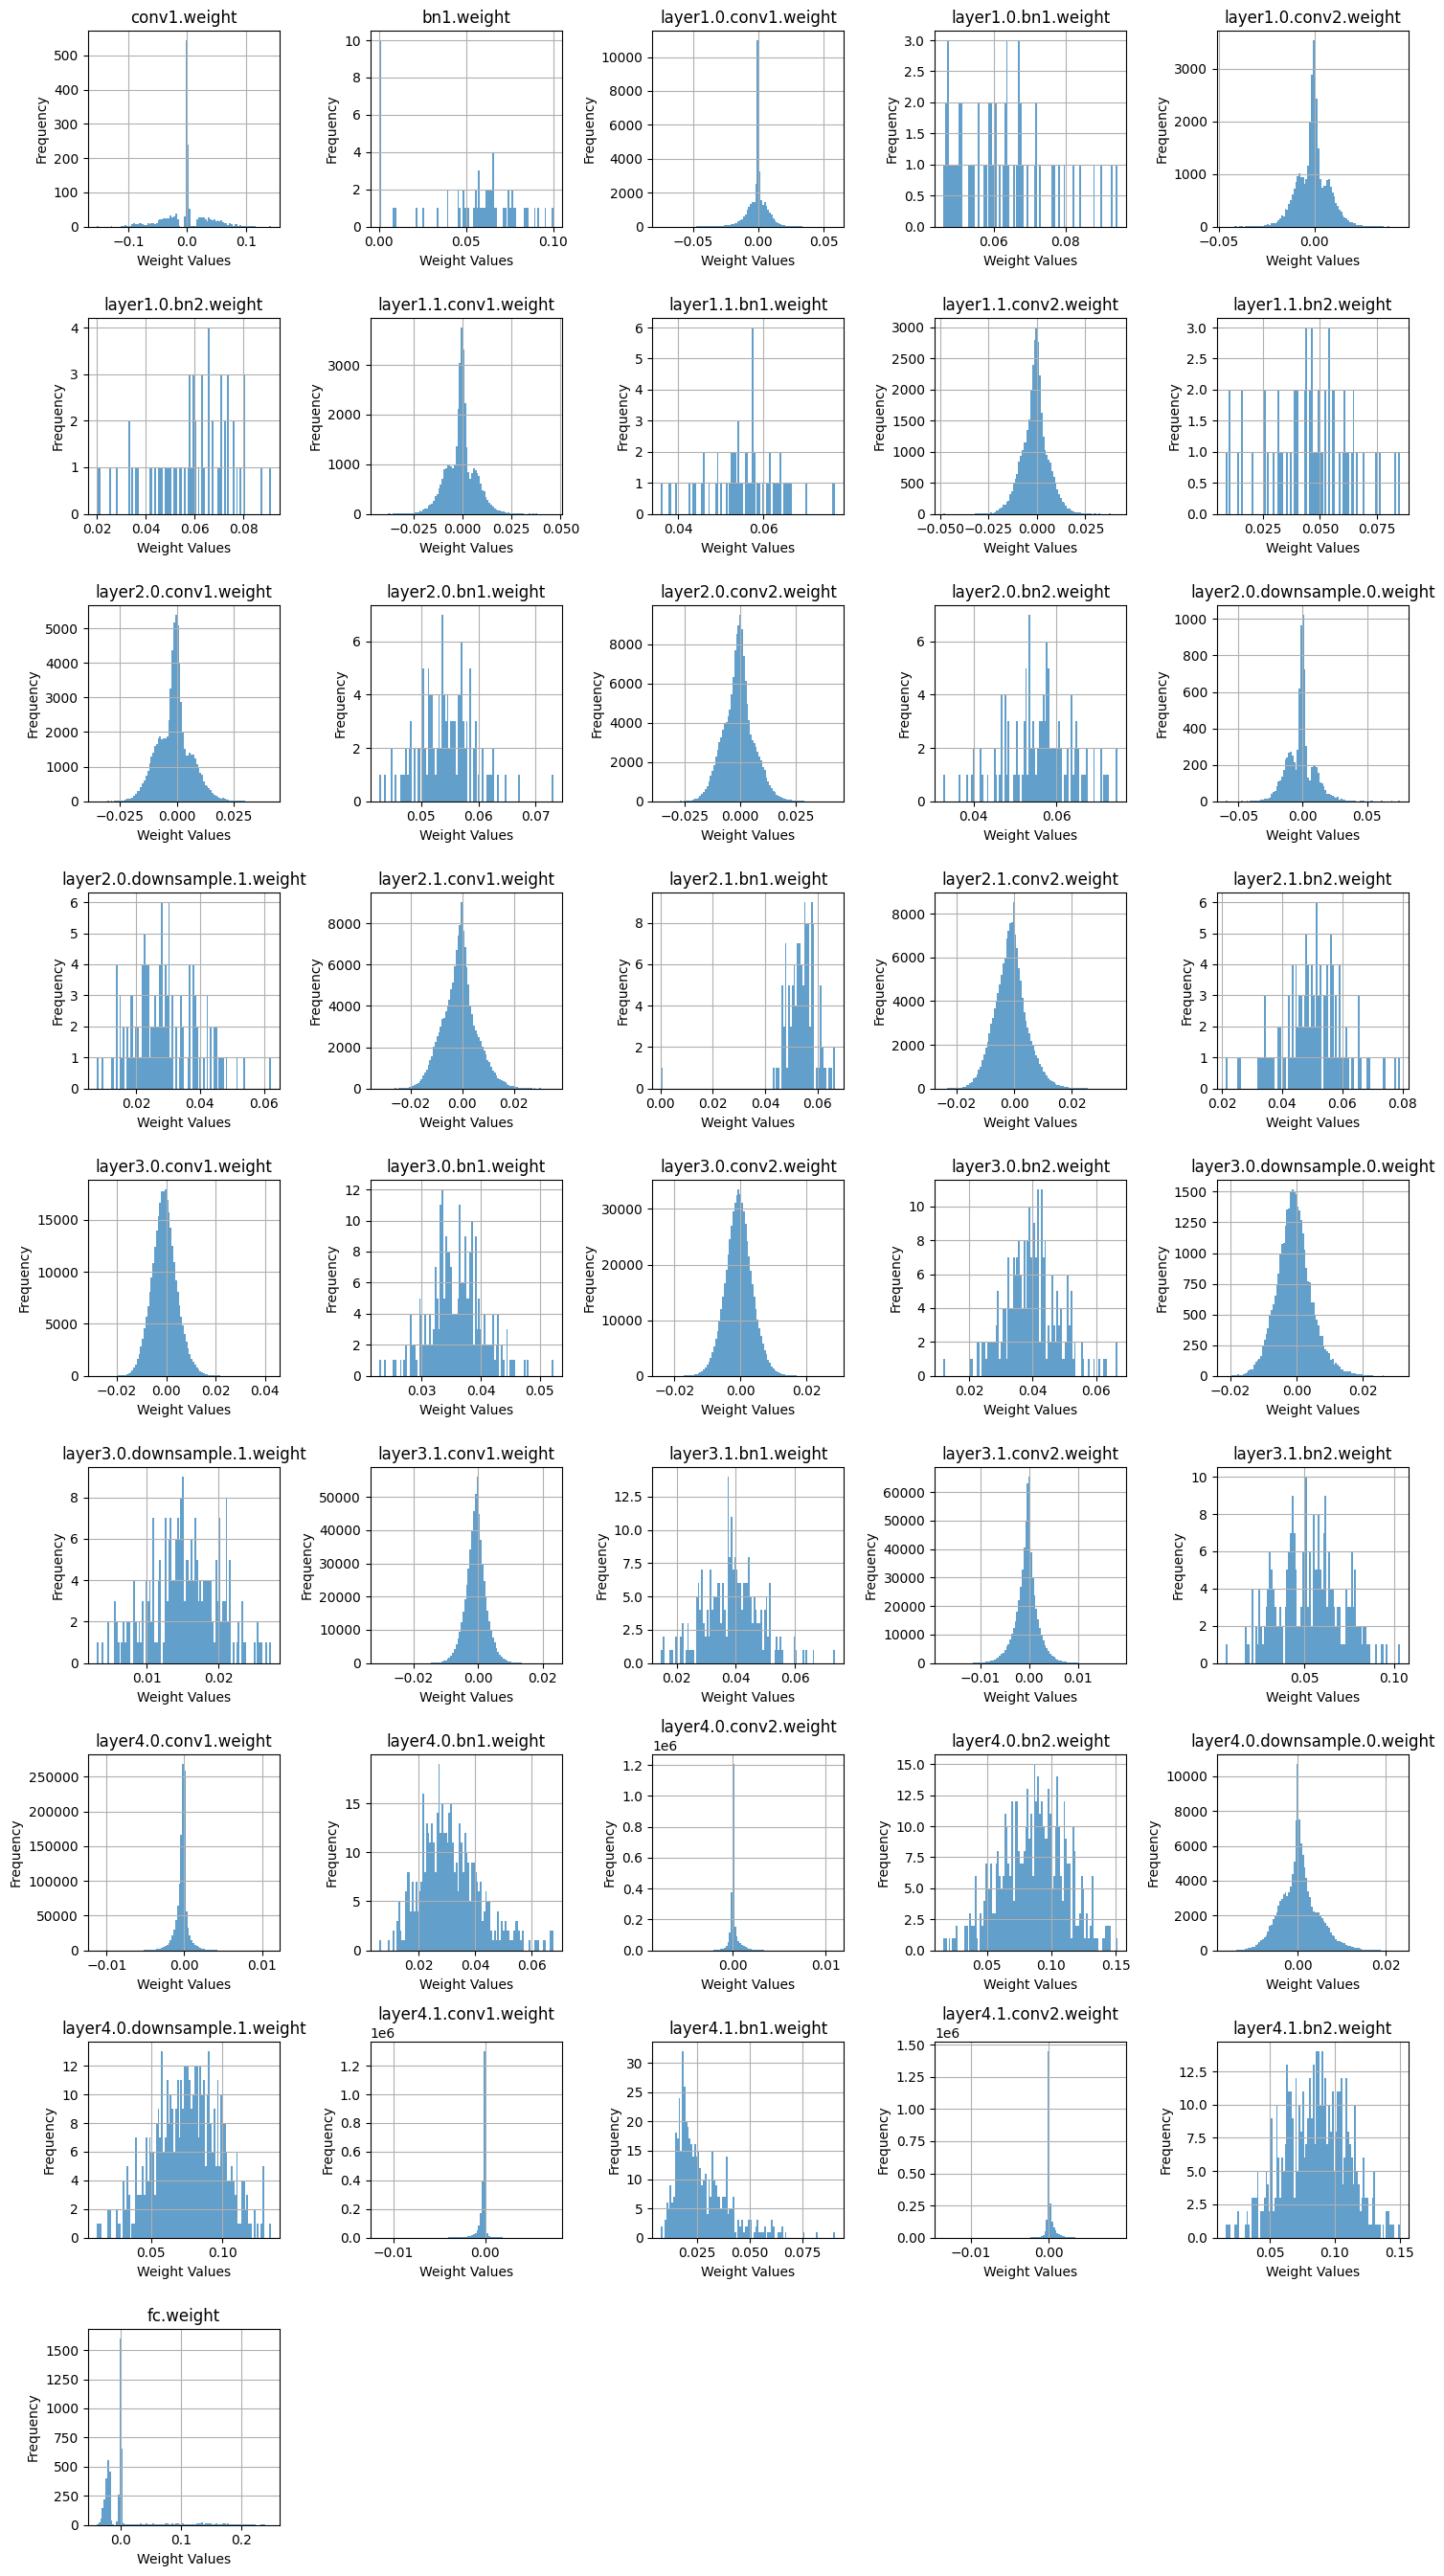

In [7]:
folder_name = 'Test_2024-10-28_15-26_Resnet18_p0.5'
model_name = '/FT_0.0001_50/best_model.pth'
dir_name = os.getcwd() + '/TestRun/'
folder_path = dir_name + folder_name
ft_model = torch.load(f'{folder_path}/{model_name}', map_location="cpu")
PlotModule.plot_weight_dist_all(ft_model)